In [804]:
import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [816]:
df= pd.read_csv("/content/Salary_Data.csv")

In [811]:
df.shape

(7000, 29)

In [843]:
df.tail(20)

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,Education
62622,1288,11,250000,109,18.0,5.0,175000.0,50000.0,30000.0,1,8816,506.0,2
62623,628,1,175000,816,6.0,2.0,135000.0,29000.0,11000.0,1,7416,825.0,2
62624,818,11,157000,858,3.0,3.0,134000.0,8000.0,15000.0,1,11527,819.0,2
62625,818,8,185000,765,2.0,2.0,130000.0,39000.0,16000.0,1,11521,819.0,2
62626,818,11,122000,765,1.0,0.0,106500.0,20000.0,10000.0,1,11521,819.0,2
62627,556,11,169000,814,0.0,0.0,125000.0,25000.0,18750.0,1,7413,807.0,2
62628,818,8,171000,76,1.0,1.0,116000.0,42850.0,12500.0,1,11470,819.0,2
62629,818,11,132000,765,0.0,0.0,108000.0,17500.0,6250.0,1,11521,819.0,2
62630,818,12,250000,858,7.0,7.0,180000.0,25000.0,45000.0,1,11527,819.0,2
62631,461,12,421000,561,13.0,3.0,193000.0,200000.0,28950.0,1,7300,807.0,2


In [813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                7000 non-null   object 
 1   company                  6999 non-null   object 
 2   level                    6996 non-null   object 
 3   title                    7000 non-null   object 
 4   totalyearlycompensation  7000 non-null   int64  
 5   location                 7000 non-null   object 
 6   yearsofexperience        7000 non-null   float64
 7   yearsatcompany           7000 non-null   float64
 8   tag                      6546 non-null   object 
 9   basesalary               7000 non-null   float64
 10  stockgrantvalue          7000 non-null   float64
 11  bonus                    7000 non-null   int64  
 12  gender                   4040 non-null   object 
 13  otherdetails             354 non-null    object 
 14  cityid                  

In [814]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.0,7000.000000,7000.0,7000.0,7000.0,7000.000000,7000.0,7000.0,7000.0
mean,2.454068e+05,7.357476,2.914426,119086.121429,55319.521429,18866.624286,9253.194286,715.446143,4849.126714,0.000143,0.0,0.000714,0.0,0.0,0.0,0.000143,0.0,0.0,0.0
std,1.305372e+05,5.771663,3.302426,75629.141125,84800.238308,29533.233934,4125.306402,216.543345,2615.235191,0.011952,0.0,0.026718,0.0,0.0,0.0,0.011952,0.0,0.0,0.0
min,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1153.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
25%,1.610000e+05,3.000000,1.000000,90000.000000,0.000000,0.000000,7416.000000,807.000000,2656.750000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
50%,2.100000e+05,6.000000,2.000000,135000.000000,25000.000000,14000.000000,7472.000000,807.000000,4830.500000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
75%,3.000000e+05,10.000000,4.000000,165000.000000,75000.000000,25000.000000,11521.000000,819.000000,7091.250000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
max,1.800000e+06,38.000000,30.000000,655000.000000,1000000.000000,1000000.000000,47926.000000,862.000000,9462.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0


In [817]:
df.isnull().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [823]:
df=df.drop(["Race","otherdetails","tag"],axis=1)

In [824]:
df.shape

(62642, 26)

In [825]:
df.isnull().sum()

timestamp                    0
company                      5
level                      119
title                        0
totalyearlycompensation      0
location                     0
yearsofexperience            0
yearsatcompany               0
basesalary                   0
stockgrantvalue              0
bonus                        0
gender                       0
cityid                       0
dmaid                        2
rowNumber                    0
Masters_Degree               0
Bachelors_Degree             0
Doctorate_Degree             0
Highschool                   0
Some_College                 0
Race_Asian                   0
Race_White                   0
Race_Two_Or_More             0
Race_Black                   0
Race_Hispanic                0
Education                    0
dtype: int64

In [821]:
# Impute "categorical null values" with Mode value
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['Education'].fillna(df['Education'].mode()[0], inplace=True)

In [844]:
Data_dict = pd.DataFrame(df.dtypes)
Data_dict

,0
company,int64
title,int64
totalyearlycompensation,int64
location,int64
yearsofexperience,float64
yearsatcompany,float64
basesalary,float64
stockgrantvalue,float64
bonus,float64
gender,int64


In [827]:
Data_dict['MissingVal'] = df.isnull().sum()
Data_dict

,0,MissingVal
timestamp,object,0
company,object,5
level,object,119
title,object,0
totalyearlycompensation,int64,0
location,object,0
yearsofexperience,float64,0
yearsatcompany,float64,0
basesalary,float64,0
stockgrantvalue,float64,0


In [828]:

df.fillna("Not_given", inplace = True)

In [830]:
df.isnull().sum()

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Education                  0
dtype: int64

In [832]:
# Droping the unwanted columns

df.drop(columns='timestamp', inplace=True)
df.drop(columns='Masters_Degree', inplace=True)
df.drop(columns='Bachelors_Degree', inplace=True)
df.drop(columns='Doctorate_Degree', inplace=True)
df.drop(columns='Highschool', inplace=True)
df.drop(columns='Some_College', inplace=True)

In [833]:
df.drop(columns='Race_Asian', inplace=True)
df.drop(columns='Race_White', inplace=True)
df.drop(columns='Race_Two_Or_More', inplace=True)
df.drop(columns='Race_Black', inplace=True)
df.drop(columns='Race_Hispanic', inplace=True)
df.drop(columns='level', inplace=True)
df.drop(columns='rowNumber', inplace=True)

In [834]:
df.shape

(62642, 13)

In [835]:
df.columns

Index(['company', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue',
       'bonus', 'gender', 'cityid', 'dmaid', 'Education'],
      dtype='object')

In [836]:
from sklearn.preprocessing import LabelEncoder

# Define a categorical feature
company = df['company']
title = df['title']
gender = df['gender']
location = df['location']
Education = df['Education']


# Create a label encoder object
le = LabelEncoder()

# Fit the label encoder to the categorical feature and transform it
df['company'] = le.fit_transform(company)
df['title'] = le.fit_transform(title)
df['gender'] = le.fit_transform(gender)
df['location'] = le.fit_transform(location)
df['Education'] = le.fit_transform(Education)

ValueError: ignored

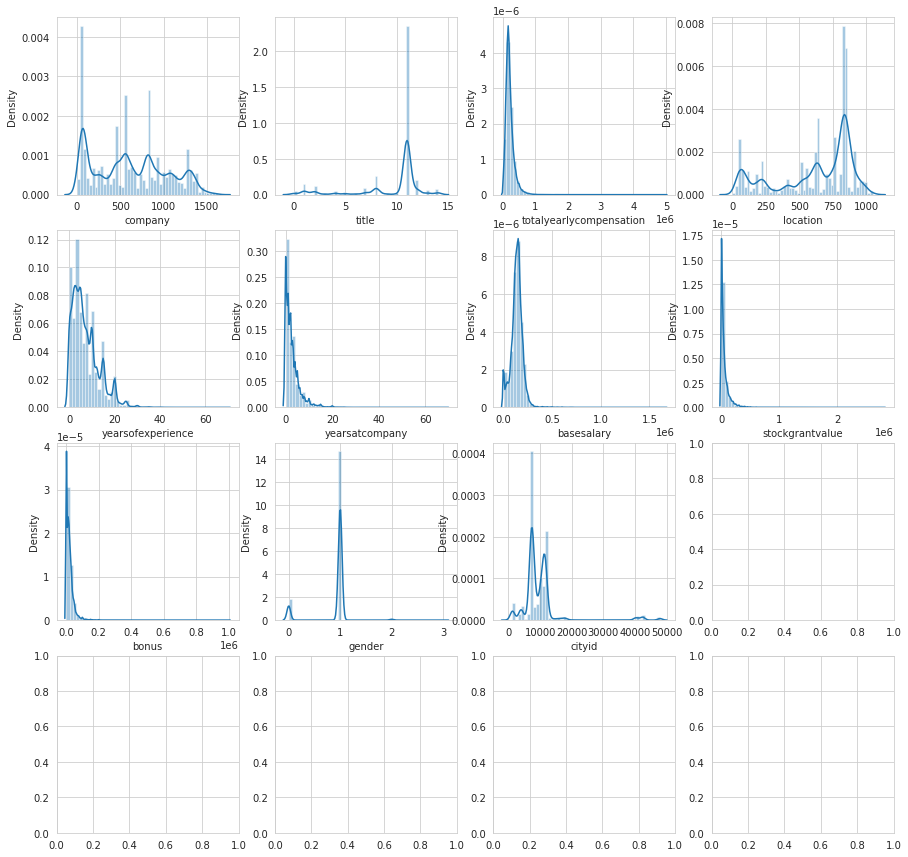

In [837]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(15, 15))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


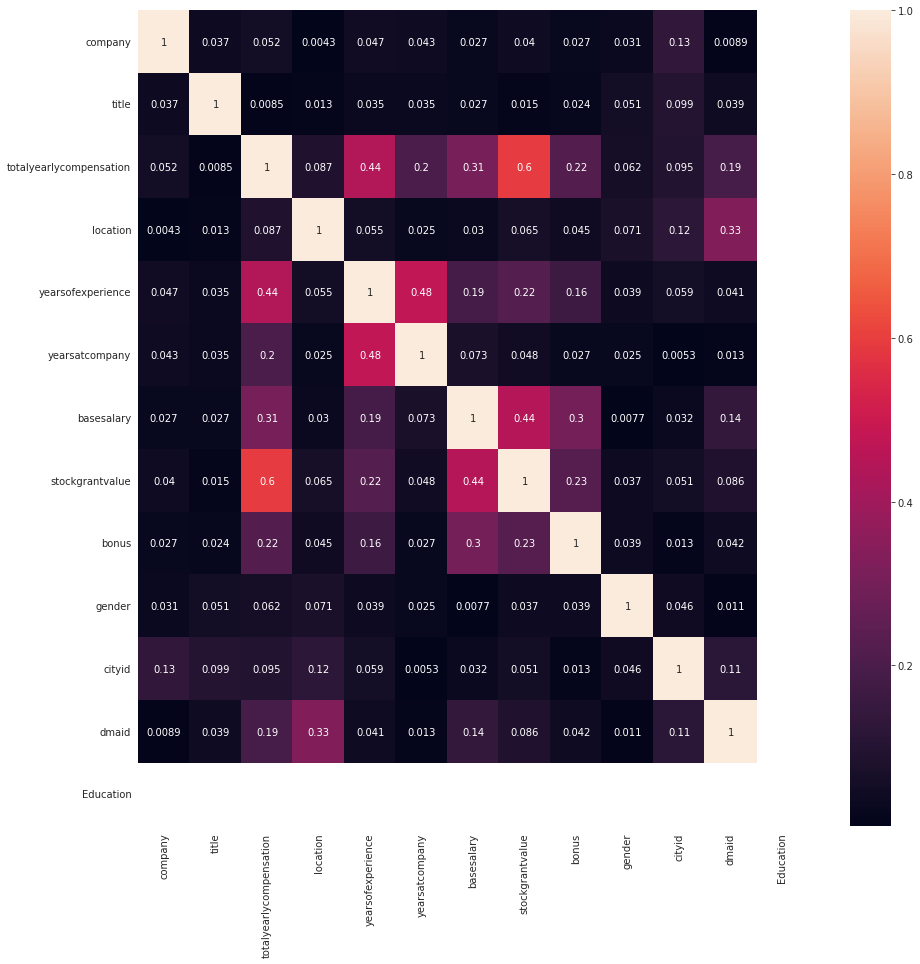

In [787]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr().abs(),annot=True)

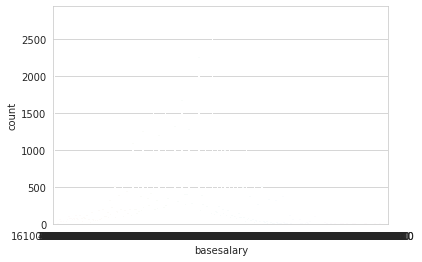

In [838]:
sns.set_style('whitegrid')
sns.countplot(x='basesalary',data=df)

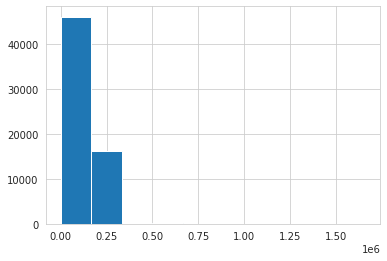

In [839]:
df.describe()
plt.hist(df['basesalary'])
plt.show()

TypeError: ignored

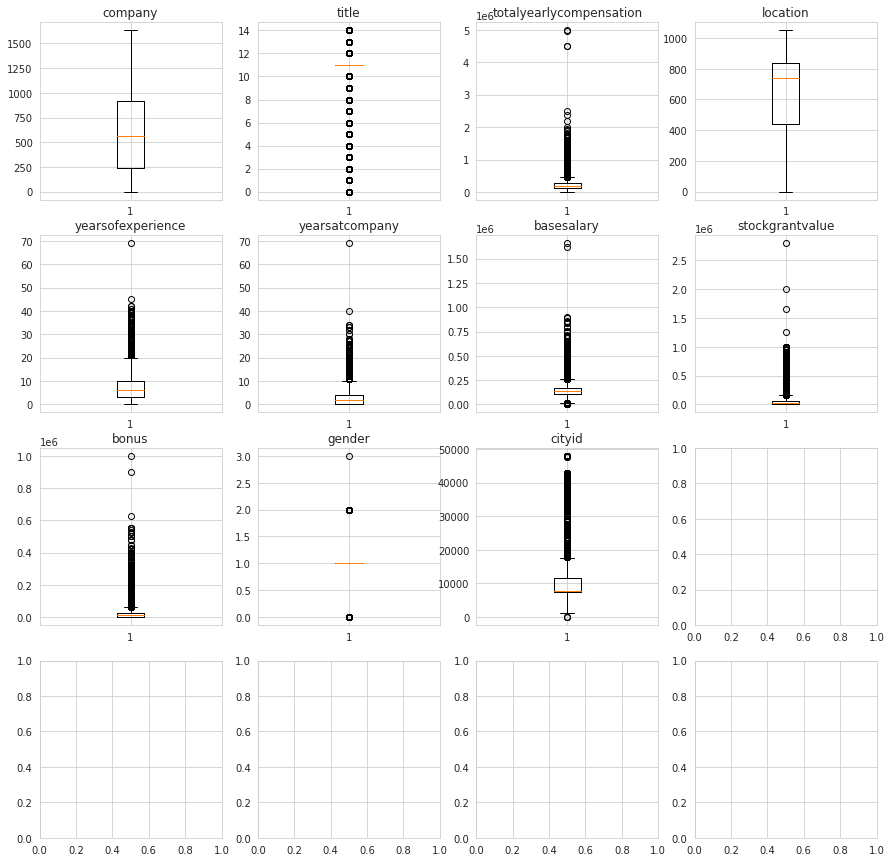

In [840]:
# Create a 4x4 grid of subplots
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(15, 15))

# Create a box plot for each column of the DataFrame
for i, col in enumerate(df.columns):
    ax = axes[i//4][i%4]
    ax.boxplot(df[col])
    ax.set_title(col)

# Set title and labels for the plot
fig.suptitle('Outlier Plot')

# Show the plot
plt.show()

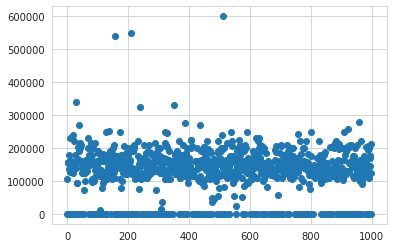

In [791]:
plt.scatter(df.index, df['basesalary'])
plt.show()

In [841]:
def find_outliers_IQR(df):
  Q1 = np.percentile(df, 25)
  Q3 = np.percentile(df, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  outliers = df[(df > lower_bound) | (df < upper_bound)]
  return outliers, Q1, Q3, IQR

In [ ]:
outliers=find_outliers_IQR(df)
print(outliers)

In [794]:
# Split the data into features and target
features = df.drop(['basesalary'], axis=1).values
target = df['basesalary'].values.reshape(-1, 1)

In [795]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33,  random_state = 2)

In [796]:
# creating a class for Lasso Regression

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):     # missed "self"
      self.upadte_weights()


  # function for updating the weight & bias value
  def upadte_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m 

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

    


  # Predicting the Target variable
  def predict(self,X):
    return np.dot(X, self.w.reshape(-1,1)) + self.b
  
  def mean_squared_error(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse1 = sum(squared_differences) / len(squared_differences)
      
      return mse1
  def r2(self,y_true, y_pred):
    # Calculate the mean of the true values
    y_true_mean = sum(y_true) / len(y_true)
    
    # Calculate the total sum of squares (TSS)
    tss = sum((y_true - y_true_mean) ** 2)
    
    # Calculate the residual sum of squares (RSS)
    rss = sum((y_true - y_pred) ** 2)
    
    # Calculate the R-squared value
    r2_score = 1 - (rss / tss)
    
    return r2_score


In [797]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [798]:
model = Lasso_Regression(learning_rate = 0.1, no_of_iterations=1000,
                         lambda_parameter=200)

In [799]:
model.fit(X_train, y_train)

In [800]:
test_data_prediction = model.predict(X_test)

In [801]:
from sklearn import metrics

# R squared error
score_1 = model.r2(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = model.mean_squared_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Squared Error : ', score_2)

R squared error :  [0.16859972]
Mean Squared Error :  [4.31275901e+09]


In [802]:
def randomized_search_cv(X, y, model, param_distributions, n_iter=10, cv=3, random_state=None):
    if random_state is not None:
        random.seed(random_state)
        
    best_score = float('-inf')
    best_params = None
    
    for i in range(n_iter):
        params = {}
        for param_name, distribution in param_distributions.items():
            if isinstance(distribution, list):
                params[param_name] = random.choice(distribution)
            elif isinstance(distribution, tuple) and len(distribution) == 2:
                low, high = distribution
                params[param_name] = random.uniform(low, high)
            else:
                raise ValueError('Invalid parameter distribution')
        
        model.set_params(**params)
        
        scores = []
        for j in range(cv):
            mask = [k % cv != j for k in range(len(X))]
            X_train = X[mask]
            y_train = y[mask]
            X_test = X[~mask]
            y_test = y[~mask]
            
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            scores.append(score)
        
        mean_score = sum(scores) / len(scores)
        if mean_score > best_score:
            best_score = mean_score
            best_params = params
            
    return best_params, best_score

def randomized_search_cv(X, y, model, param_distributions, n_iter=10, cv=3, random_state=None):


This is a function definition for randomized_search_cv, which takes in five parameters: X, y, model, param_distributions, n_iter, cv, and random_state.

X: The input features (independent variables) as a NumPy array or Pandas DataFrame.

y: The output labels (dependent variable) as a NumPy array or Pandas Series.

model: An estimator object implementing fit and score methods.

param_distributions: A dictionary of hyperparameters and their distributions to sample from.

n_iter: The number of parameter settings that are sampled.

cv: The number of folds in cross-validation.

random_state: A seed for the random number generator

    if random_state is not None:
        random.seed(random_state)
If random_state is not None, this sets the seed for the random number generator.

best_score = float('-inf')

    best_params = None
    
Initialize the variables best_score and best_params.

best_score: The highest score achieved so far.
best_params: The hyperparameters that achieved the best score.

 for i in range(n_iter):
 
Iterate n_iter times.

     params = {}
Initialize an empty dictionary to store the hyperparameters.

     for param_name, distribution in param_distributions.items():
Iterate over the hyperparameters and their distributions.

if isinstance(distribution, list):

                params[param_name] = random.choice(distribution)
If the distribution is a list, randomly select a value from it.

elif isinstance(distribution, tuple) and len(distribution) == 2:

                low, high = distribution
                params[param_name] = random.uniform(low, high)
If the distribution is a tuple of length 2, randomly select a value from a uniform distribution between the two values.

else:

                raise ValueError('Invalid parameter distribution')
If the distribution is not a list or a tuple of length 2, raise an error.

 model.set_params(**params)
 
Set the hyperparameters of the model to the randomly selected values.

 scores = []
 
Initialize an empty list to store the scores.

 for j in range(cv):
 
Iterate over cv folds for cross-validation.

   mask = [k % cv != j for k in range(len(X))]
   
            X_train = X[mask]
            y_train = y[mask]
            X_test = X[~mask]
            y_test = y[~mask]

Split the data into training and testing sets for the current fold of cross-validation.

model.fit(X_train, y_train)

            score = model.score(X_test, y_test)
            scores.append(score)
Fit the model on the training data and evaluate the score on the testing data, and append the score to the list of scores.

  mean_score = sum(scores) / len(scores)
  
Calculate the mean score across all folds of cross-validation.

    if mean_score > best_score:
            best_score = mean_score
            best_params = params
If the mean score is greater than the current best score, update the best score and best hyperparameters.